# load dataset

In [6]:
import cv2
import matplotlib.pyplot as plt
import imutils
from PIL import Image
import os
import random
from tqdm import tqdm
import numpy as np
import pandas as pd
import seaborn as sns

train_dir = '/home/natthakit/304proj/dataset/train/'
test_dir = '/home/natthakit/304proj/dataset/val/'

In [7]:
os.mkdir('/home/natthakit/304proj/pre_dataset')

os.mkdir('/home/natthakit/304proj/pre_dataset/train/')
os.mkdir('/home/natthakit/304proj/pre_dataset/train/glioma/')
os.mkdir('/home/natthakit/304proj/pre_dataset/train/meningioma/')
os.mkdir('/home/natthakit/304proj/pre_dataset/train/notumor/')
os.mkdir('/home/natthakit/304proj/pre_dataset/train/pituitary/')



os.mkdir('/home/natthakit/304proj/pre_dataset/val/')
os.mkdir('/home/natthakit/304proj/pre_dataset/val/glioma/')
os.mkdir('/home/natthakit/304proj/pre_dataset/val/meningioma/')
os.mkdir('/home/natthakit/304proj/pre_dataset/val/notumor/')
os.mkdir('/home/natthakit/304proj/pre_dataset/val/pituitary/')



In [8]:
def crop_image(image_path, plot=False, preprocess=False):
    # Read the image
    image = cv2.imread(image_path)
    if image is None:
        raise ValueError(f"Image at path {image_path} could not be loaded. Check the file path.")
    
    # Convert to grayscale and apply Gaussian blur
    img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    img_gray = cv2.GaussianBlur(img_gray, (5, 5), 0)
    
    # Thresholding, erosion, and dilation
    img_thresh = cv2.threshold(img_gray, 45, 255, cv2.THRESH_BINARY)[1]
    img_thresh = cv2.erode(img_thresh, None, iterations=2)
    img_thresh = cv2.dilate(img_thresh, None, iterations=2)

    # Find contours
    contours = cv2.findContours(img_thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contours = imutils.grab_contours(contours)
    c = max(contours, key=cv2.contourArea)

    # Get extreme points of the largest contour
    extLeft = tuple(c[c[:, :, 0].argmin()][0])
    extRight = tuple(c[c[:, :, 0].argmax()][0])
    extTop = tuple(c[c[:, :, 1].argmin()][0])
    extBot = tuple(c[c[:, :, 1].argmax()][0])
    
    # Crop the image using the extreme points
    new_image = image[extTop[1]:extBot[1], extLeft[0]:extRight[0]]            

    if plot:
        # Display the images
        plt.figure()
        plt.subplot(1, 2, 1)
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.title('Original Image')
        plt.subplot(1, 2, 2)
        plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.title('Cropped Image')
        plt.show()
    
    original_image = cv2.cvtColor(new_image, cv2.COLOR_BGR2GRAY)

    # 1. Apply Gaussian Blurring for noise suppression
    gaussian_blurred = cv2.GaussianBlur(original_image, (5, 5), 0)

    # 2. Apply sharpening (use a kernel for edge enhancement)
    sharpening_kernel = np.array([[0, -1, 0],
                                [-1, 5, -1],
                                [0, -1, 0]])
    sharpened_image = cv2.filter2D(gaussian_blurred, -1, sharpening_kernel)

    # 3. Apply CLAHE (Contrast Limited Adaptive Histogram Equalization)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    clahe_image = clahe.apply(sharpened_image)

    img2 = np.zeros_like(new_image)
    img2[:,:,0] = clahe_image
    img2[:,:,1] = clahe_image
    img2[:,:,2] = clahe_image
    return img2

(421, 370, 3)

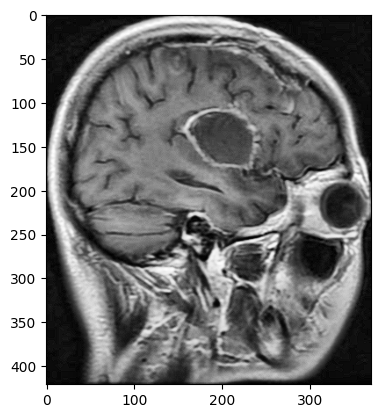

In [11]:
i = crop_image('/home/natthakit/304proj/dataset/val/glioma/Te-gl_0278.jpg')
plt.imshow(i)
i.shape

In [9]:
#crop training images and save it to the directory we previously created
glioma = train_dir + 'glioma'
meningioma = train_dir + 'meningioma'
pituitary = train_dir + 'pituitary'
no_tumor = train_dir + 'notumor'

j = 0
for i in tqdm(os.listdir(glioma)):
  path = os.path.join(glioma, i)
  img = crop_image(path, plot=False)

  if img is not None:
    img = cv2.resize(img, (256,256))
    save_path = '/home/natthakit/304proj/pre_dataset/train/glioma/' + str(j) + '.jpg'
    cv2.imwrite(save_path, img)
    j = j + 1

j = 0
for i in tqdm(os.listdir(meningioma)):
  path = os.path.join(meningioma, i)
  img = crop_image(path, plot=False)

  if img is not None:
    img = cv2.resize(img, (256,256))
    save_path = '/home/natthakit/304proj/pre_dataset/train/meningioma/' + str(j) + '.jpg'
    cv2.imwrite(save_path, img)
    j = j + 1  

j = 0
for i in tqdm(os.listdir(pituitary)):
  path = os.path.join(pituitary, i)
  img = crop_image(path, plot=False)

  if img is not None:
    img = cv2.resize(img, (256,256))
    save_path = '/home/natthakit/304proj/pre_dataset/train/pituitary/' + str(j) + '.jpg'
    cv2.imwrite(save_path, img)
    j = j + 1  

j = 0
for i in tqdm(os.listdir(no_tumor)):
  path = os.path.join(no_tumor, i)
  img = crop_image(path, plot=False)

  if img is not None:
    img = cv2.resize(img, (256,256))
    save_path = '/home/natthakit/304proj/pre_dataset/train/notumor/' + str(j) + '.jpg'
    cv2.imwrite(save_path, img)
    j = j + 1  

100%|██████████| 1595/1595 [00:03<00:00, 469.97it/s]


In [12]:

#crop testing images and save it to the directory we previously created
test_glioma = test_dir + 'glioma'
test_meningioma = test_dir + 'meningioma'
test_pituitary = test_dir + 'pituitary'
test_no_tumor = test_dir + 'notumor'

j = 0
for i in tqdm(os.listdir(test_glioma)):
  path = os.path.join(test_glioma, i)
  img = crop_image(path, plot=False)

  if img is not None:
    img = cv2.resize(img, (256,256))
    save_path = '/home/natthakit/304proj/pre_dataset/val/glioma/' + str(j) + '.jpg'
    cv2.imwrite(save_path, img)
    j = j + 1

j = 0
for i in tqdm(os.listdir(test_meningioma)):
  path = os.path.join(test_meningioma, i)
  img = crop_image(path, plot=False)

  if img is not None:
    img = cv2.resize(img, (256,256))
    save_path = '/home/natthakit/304proj/pre_dataset/val/meningioma/' + str(j) + '.jpg'
    cv2.imwrite(save_path, img)
    j = j + 1  

j = 0
for i in tqdm(os.listdir(test_pituitary)):
  path = os.path.join(test_pituitary, i)
  img = crop_image(path, plot=False)

  if img is not None:
    img = cv2.resize(img, (256,256))
    save_path = '/home/natthakit/304proj/pre_dataset/val/pituitary/' + str(j) + '.jpg'
    cv2.imwrite(save_path, img)
    j = j + 1  

j = 0
for i in tqdm(os.listdir(test_no_tumor)):
  path = os.path.join(test_no_tumor, i)
  img = crop_image(path, plot=False)

  if img is not None:
    img = cv2.resize(img, (256,256))
    save_path = '/home/natthakit/304proj/pre_dataset/val/notumor/' + str(j) + '.jpg'
    cv2.imwrite(save_path, img)
    j = j + 1  

100%|██████████| 405/405 [00:01<00:00, 403.86it/s]


In [13]:
os.mkdir('/home/natthakit/304proj/pre_dataset/test/')

In [1]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Define directories
val_dir = "/home/natthakit/304proj/dataset/val/"
test_dir = "/home/natthakit/304proj/dataset/test/"

# Create test directory if it doesn't exist
os.makedirs(test_dir, exist_ok=True)

# Iterate through class directories
for class_name in os.listdir(val_dir):
    class_path = os.path.join(val_dir, class_name)
    print(class_name)
    if not os.path.isdir(class_path):
        continue  # Skip non-directory files

    # Get all image files in the class directory
    images = [f for f in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, f))]
    print(len(images))
    train_imgs, test_imgs = train_test_split(images, test_size=0.2, random_state=42)  # 20% for test

    # Create class folder in test directory
    test_class_dir = os.path.join(test_dir, class_name)
    os.makedirs(test_class_dir, exist_ok=True)

    # Move test images
    for img in test_imgs:
        src_path = os.path.join(class_path, img)
        dest_path = os.path.join(test_class_dir, img)
        shutil.move(src_path, dest_path)

print("Images have been successfully split into test directory.")


notumor
405
pituitary
300
glioma
300
meningioma
306
Images have been successfully split into test directory.
